# SVM Test Implementation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [6]:
# Dataset import
data = pd.read_csv('extracted_dataset.csv')

# Dataset normalization
data_mean = data.mean()
data_std = data.std()

data_normalized = (data - data_mean) / data_std

In [111]:
dataset = data_normalized.to_numpy()[:, 1:4]

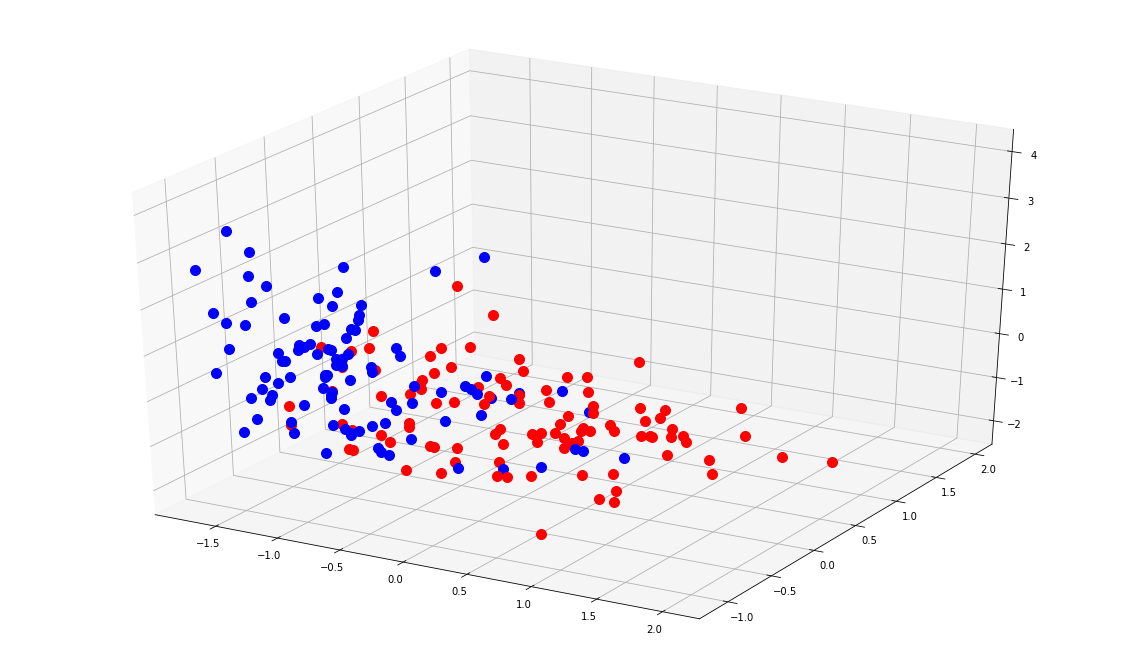

In [8]:
class1_data = dataset[900:1000, :]
class2_data = dataset[100:200, :]

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

for i in range(100):
  ax.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
  ax.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

In [9]:
reg = 0.001
learning_rate = 0.02

In [10]:
w = np.random.randn(3)
b = 0

In [11]:
def classify(x):
  return (np.dot(w, x) - b)

# Hingeloss

$l(x,y)=\max({0,\text{classify}(x) * y})$

In [12]:
def hingeloss(x, y):
  prod = y * classify(x)

  if prod >= 1: return 0
  else: return 1-prod

In [13]:
def hinge_derivative_w(x, y):
  prod = y * classify(x)
  prod_elem = y * x
  if prod >= 1: return np.zeros(x.shape[0])
  else: return -prod_elem

In [14]:
def hinge_derivative_b(x, y):
  prod = y * classify(x)
  if prod >= 1: return 0
  else: return y

[ 0.63428445  0.99619901 -0.63062186]
-0.9051000000000012


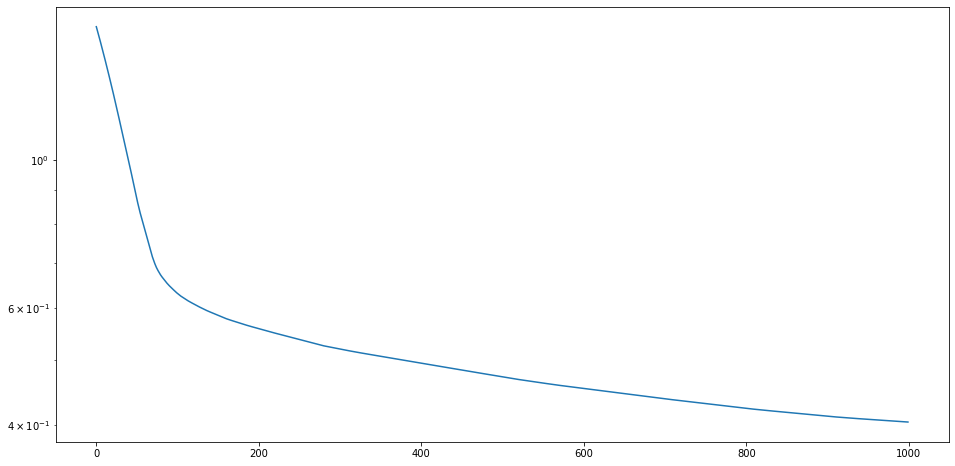

In [15]:
history_loss = list()
loss = 0

for epoch in range(1000):
  gradient_w = np.zeros(w.size)
  gradient_b = 0

  for sample_index in range(100):
    gradient_w += hinge_derivative_w(class1_data[sample_index,:], 1)
    gradient_w += hinge_derivative_w(class2_data[sample_index,:], -1)
    gradient_b += hinge_derivative_b(class1_data[sample_index,:], 1)
    gradient_b += hinge_derivative_b(class2_data[sample_index,:], -1)

  gradient_w /= 200.0
  gradient_b /= 200.0

  w = w - learning_rate * gradient_w
  b = b - learning_rate * gradient_b

  loss=0
  for sample_index in range(100):
    loss += hingeloss(class1_data[sample_index,:], 1)
    loss += hingeloss(class2_data[sample_index,:], -1)

  history_loss.append(loss/200)

fig, axs = plt.subplots(figsize = (16,8))

axs.semilogy(history_loss)

In [16]:
confusion_mat = np.zeros((2,2))

for test_index in range(100):
  predicted = 0 if classify(class1_data[test_index,:]) >= 0 else 1
  confusion_mat[0,predicted] += 1
  predicted = 0 if classify(class2_data[test_index,:]) >= 0 else 1
  confusion_mat[1,predicted] += 1
print(confusion_mat)
print(confusion_mat.trace() / confusion_mat.sum())

[[86. 14.]
 [16. 84.]]
0.85


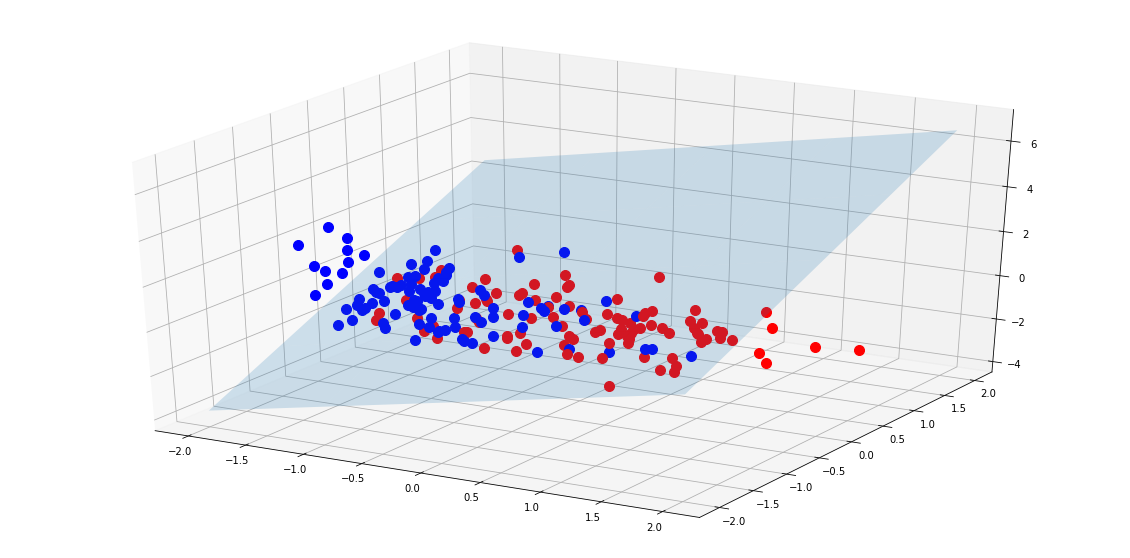

In [17]:
# create x,y
xx, yy = np.meshgrid(range(-2,3), range(-2,3))

# calculate corresponding z
z = (-w[0] * xx - w[1] * yy + b) * 1. / w[2]

# plot the surface
plt3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)


#and i would like to plot this point : 
for i in range(100):
  plt3d.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
  plt3d.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

plt.show()

# Feature Mapping for higher dimensional projection of features

In [18]:
def phi(x):
  f1 = x[0]
  f2 = x[1]
  f3 = x[2]
  return np.array([f1, f2, f3, f1**2, f2**2, f3**2, f1*f2, f2*f3, f1*f3])

[ 0.2209153   1.4365106  -0.1457953   0.10129091 -0.76562434  0.10582585
 -0.3874347   0.34318969 -0.03680288]
-1.5570999999999275


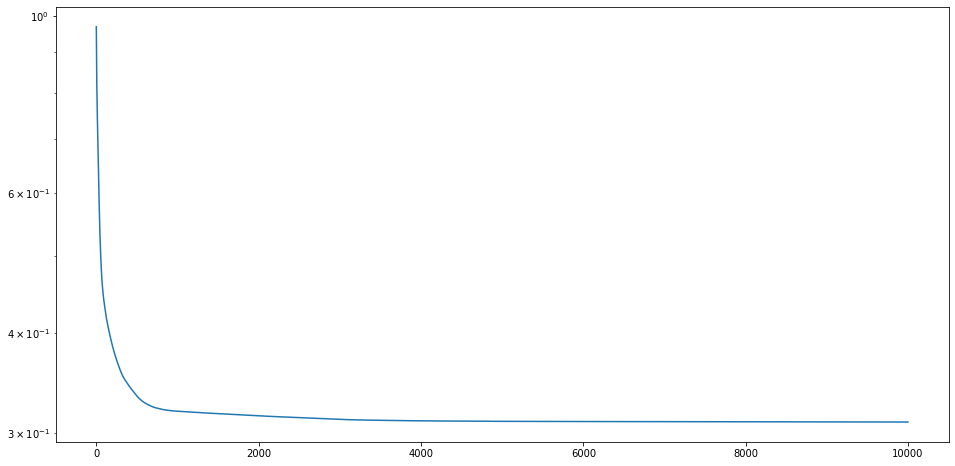

In [19]:
feature_size = 9
w = np.zeros(feature_size)
b = 0

history_loss = list()
loss = 0

for epoch in range(10000):
  gradient_w = np.zeros(w.size)
  gradient_b = 0
  for sample_index in range(100):
    phi_1 = phi(class1_data[sample_index,:])
    phi_2 = phi(class2_data[sample_index,:])
    gradient_w += hinge_derivative_w(phi_1, 1)
    gradient_w += hinge_derivative_w(phi_2, -1)
    gradient_b += hinge_derivative_b(phi_1, 1)
    gradient_b += hinge_derivative_b(phi_2, -1)
  gradient_w /= 200.0
  gradient_b /= 200.0
  
  w = w - learning_rate * gradient_w
  b = b - learning_rate * gradient_b

  loss=0
  for sample_index in range(100):
    phi_1 = phi(class1_data[sample_index,:])
    phi_2 = phi(class2_data[sample_index,:])
    loss += hingeloss(phi_1, 1)
    loss += hingeloss(phi_2, -1)

  history_loss.append(loss/200)

print(w)
print(b)

fig, axs = plt.subplots(figsize = (16,8))

axs.semilogy(history_loss)

In [20]:
from mpl_toolkits.mplot3d import axes3d

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize=(20,12))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    for i in range(100):
      ax.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
      ax.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.


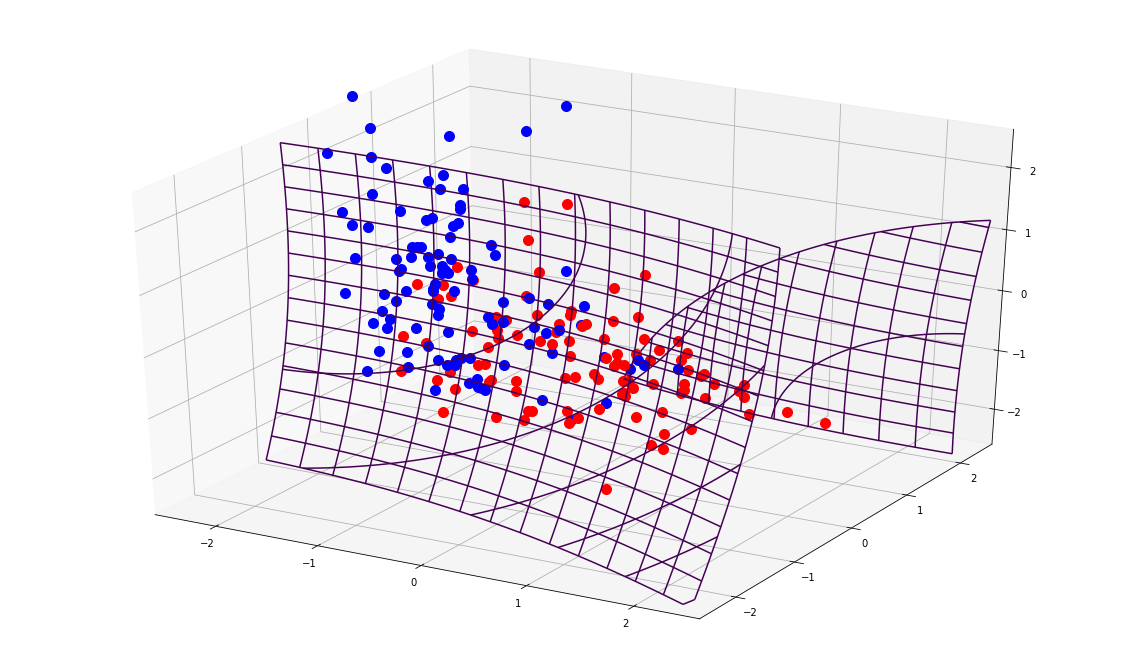

In [21]:
def surface(x,y,z):
    return w[0]*x+w[1]*y+w[2]*z+w[3]*x**2+w[4]*y**2+w[5]*z**2+w[6]*np.multiply(x,y)+w[7]*np.multiply(y,z)+w[8]*np.multiply(x,z) - b

plot_implicit(surface)

In [22]:
confusion_mat = np.zeros((2,2))

for test_index in range(100):
  predicted = 0 if classify(phi(class1_data[test_index,:])) >= 0 else 1
  confusion_mat[0,predicted] += 1
  predicted = 0 if classify(phi(class2_data[test_index,:])) >= 0 else 1
  confusion_mat[1,predicted] += 1
print(confusion_mat)
print(confusion_mat.trace() / confusion_mat.sum())

[[89. 11.]
 [12. 88.]]
0.885


# Solving SVM with the dual problem
The Lagrangian dual of the primal is
$\max L_D(c_i)=\sum_{i=1}^n{c_i}-\dfrac 1 2 \sum_{i=1}^n\sum_{j=1}^n{c_ic_jy_iy_j\Big(x_i\cdot x_j\Big)}$
s.t. $\sum_{i=1}^n{c_iy_i}=0\ \ \ \land \ \ c_i\ge 0$

In [23]:
import jax
import jax.numpy as jnp
import scipy.optimize as opt

In [24]:
def hessian(x):
  return np.zeros((200, 200))

In [25]:
a = np.zeros(200)
in_data = np.concatenate((class1_data, class2_data), axis=0)
in_labels = np.concatenate((np.ones(100), -1 * np.ones(100)), axis=None)

In [26]:
def lag(c):
  partial_1 = - jnp.sum(c)
  X_1 = in_data * in_labels[:, None]
  H = X_1 @ X_1.T
  partial_2 = (c.T @ H @ c)/2
  return partial_1 + partial_2

In [27]:
lag_jit=jax.jit(lag)

linear_constraint = opt.LinearConstraint(in_labels, 0, 0, keep_feasible=True)
res = opt.minimize(lag_jit, a, method='trust-constr', jac='2-point', hess=hessian, constraints=[linear_constraint], options={'verbose': 1, 'maxiter': 10000}, bounds=opt.Bounds(np.zeros(200), np.ones(200)*np.inf))

`xtol` termination condition is satisfied.
Number of iterations: 337, function evaluations: 3137, CG iterations: 325, optimality: 7.46e+00, constraint violation: 2.86e-16, execution time:  4.0 s.


In [28]:
c = np.array(res.x)

w = np.zeros(3)

for sample_index in range(200):
  w += c[sample_index] * in_labels[sample_index] * in_data[sample_index, :]

best_b = 0
best_prec = 0

for i in range(200):
  b = np.dot(w, in_data[i, :] - in_labels[i])
  confusion_mat = np.zeros((2,2))
  for test_index in range(100):
    predicted = 0 if classify(class1_data[test_index,:]) >= 0 else 1
    confusion_mat[0,predicted] += 1
    predicted = 0 if classify(class2_data[test_index,:]) >= 0 else 1
    confusion_mat[1,predicted] += 1
    prec = confusion_mat.trace() / confusion_mat.sum()
    if best_prec < prec:
      best_prec = prec
      best_b = b

In [29]:
confusion_mat = np.zeros((2,2))

for test_index in range(100):
  predicted = 0 if classify(class1_data[test_index,:]) >= 0 else 1
  confusion_mat[0,predicted] += 1
  predicted = 0 if classify(class2_data[test_index,:]) >= 0 else 1
  confusion_mat[1,predicted] += 1
print(confusion_mat)
print(confusion_mat.trace() / confusion_mat.sum())

[[84. 16.]
 [24. 76.]]
0.8


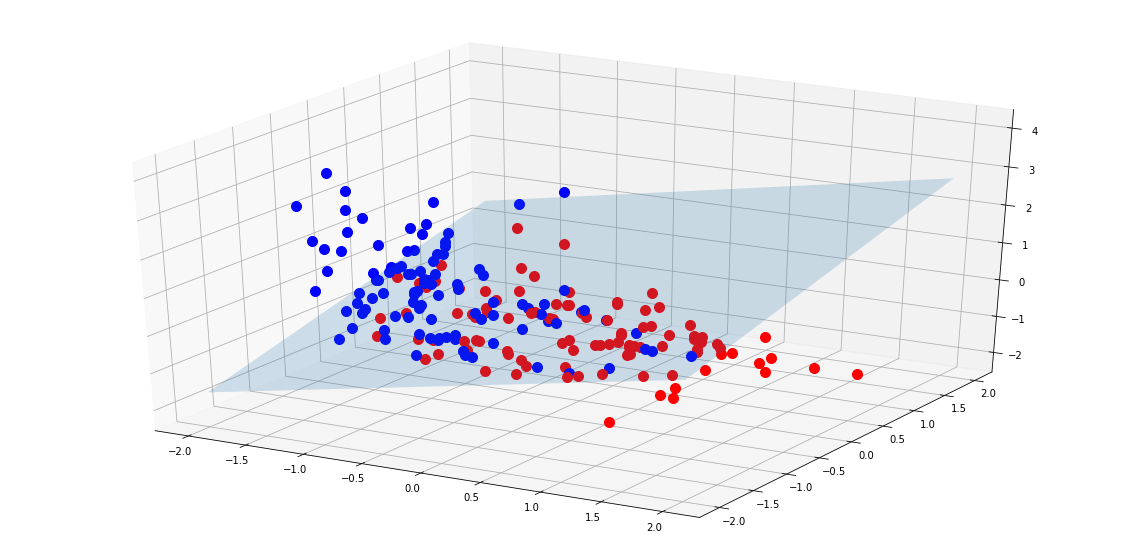

In [30]:
# create x,y
xx, yy = np.meshgrid(range(-2,3), range(-2,3))

# calculate corresponding z
z = (-w[0] * xx - w[1] * yy + b) * 1. / w[2]

# plot the surface
plt3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)


#and i would like to plot this point : 
for i in range(100):
  plt3d.scatter(class1_data[i, 0], class1_data[i, 1], class1_data[i, 2], label = 'rock', c='red', s = 100)
  plt3d.scatter(class2_data[i, 0], class2_data[i, 1], class2_data[i, 2], label = 'classical', c='blue', s = 100)

plt.show()

In [105]:
N=200
  
def kernel1_mat(xi, xj):
  return (jnp.dot(xi, xj) + np.ones((N, N)))**3

def kernel2_mat(xi, xj):
  return (jnp.dot(xi, xj) + np.ones((N, N)))
  
def kernel1_vec(xi, xj):
  return (np.dot(xi, xj) + 1)**3

def kernel2_vec(xi, xj):
  return np.dot(xi, xj) + 1

In [106]:
kernel_mat = kernel1_mat
kernel_vec = kernel1_vec

In [107]:
def lag_kernel(c):
  partial_1 = -jnp.sum(c)

  c_outer = jnp.outer(c, c)
  c_outer = jnp.triu(c_outer)

  y_outer = jnp.outer(in_labels, in_labels)
  y_outer = jnp.triu(y_outer)

  K= kernel_mat(in_data, in_data.T)

  partial_2= 0.5 * jnp.sum(c_outer * y_outer * K)

  return partial_1 + partial_2

In [108]:
lag_k_jit=jax.jit(lag_kernel)

linear_constraint = opt.LinearConstraint(in_labels, 0, 0, keep_feasible=True)
res = opt.minimize(lag_k_jit, a, method='trust-constr', jac='2-point', hess=hessian, constraints=[linear_constraint], options={'verbose': 1, 'maxiter': 1000}, bounds=opt.Bounds(np.zeros(200), np.ones(200)*np.inf))

`xtol` termination condition is satisfied.
Number of iterations: 344, function evaluations: 5144, CG iterations: 332, optimality: 6.68e+00, constraint violation: 5.02e-03, execution time:  9.0 s.


In [109]:
c = np.array(res.x)
w_phi = np.zeros(N)

index_non_zero = -1
for j in range(N):
  w_phi[j] = np.sum(np.array([c[i]*in_labels[i]*kernel_vec(in_data[j, :], in_data[i, :]) for i in range(N)]))
  if c[j]>0 and index_non_zero<0:
    index_non_zero = j

b = - in_labels[index_non_zero] + w_phi[index_non_zero]

In [110]:
confusion_mat = np.zeros((2,2))

for test_index in range(100):
  predicted = 0 if np.sign(w_phi[test_index] - b) >= 0 else 1
  confusion_mat[0,predicted] += 1
  predicted = 0 if np.sign(w_phi[test_index + 100] - b) >= 0 else 1
  confusion_mat[1,predicted] += 1
print(confusion_mat)
print(confusion_mat.trace() / confusion_mat.sum())

[[90. 10.]
 [19. 81.]]
0.855
